### Etivity 3
#### Student ID: 18200036
#### Name: Brian Parle

#### Task 3 (CE6002)

- Create your own implementation of **linear classification** to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.
- Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).
- Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!
- Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.

In [198]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [139]:
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 
print(X.shape)

(1000, 2)


<function matplotlib.pyplot.show(*args, **kw)>

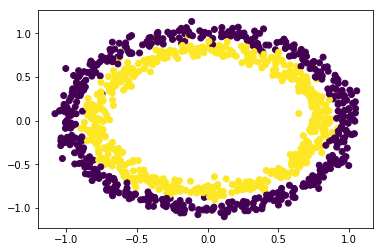

In [140]:
#plot the dataset
plt.scatter(X[:,0], X[:,1], c=y)
plt.show

In [185]:
def bp_LinearClassification(X_in, y_in):
    """
    Process the fit function and utilise sign to perform Linear Classification

    Format X to be a vector of the input values x with x0=1 bias coordinate
    Format y to be the target vector of inputs y

    Calculate X+ = (XTX)-1 XT

    Return x = X+ y
    """

    print('NOTE: This function produces errors for some matrices - use bp_LinearClassification_simplified')
    return
    w = []

    #reshape the input values
    #X_in has samples in rows - we add a column of ones
    X = X_in
    y = y_in
    print(X.shape)

    ones = np.ones(X.shape[0]).reshape(-1,1)
    print(ones)
    X = np.concatenate((ones, X), axis=1)
    print(X)
    
    XT = X.T
    XTX= XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    X_dagger= XTX_inv.dot(XT)
    
    #check arrays before calculation
    print('XT\n', XT)
    print('XTX\n', XTX)
    print('XTX_inv\n', XTX_inv)
    print('y\n',y)
    print('X_dagger\n',X_dagger)
    #X_dagger = X_dagger.transpose()
    print('X_dagger\n',X_dagger)

    w = X_dagger.dot(y)
    #finished so return the the signs of the weights
    return w

def bp_LinearClassification_simplified(X, y):
    X_inverse = np.linalg.pinv(X)
    w = np.matmul(X_inverse, y)
    return w

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def calculate_lin_class_and_plot_data(X, y, experiment):

    weights = bp_LinearClassification_simplified(X, y)

    #apply classification
    y_predict = np.sign(X.dot(weights))

    plt.scatter(X[:,1], X[:,2], c=y)
    minx = min(X[:,1:2])
    maxx = max(X[:,1:2])
    plt.plot([minx, maxx], [point_on_boundary(weights, minx), point_on_boundary(weights, maxx)])
    plt.title(experiment + '- actual.')
    plt.show()

    plt.scatter(X[:,1], X[:,2], c=y_predict)
    plt.title(experiment + '- predicted.')
    plt.plot([minx, maxx], [point_on_boundary(weights, minx), point_on_boundary(weights, maxx)])
    plt.show()
       
    return weights, y_predict


def calculate_MSE(a, b):
    #calculate the sum of square errors
    sum_square_diff = 0
    N = len(a)
    for i in range(N):
        sum_square_diff += (a[i] - b[i]) ** 2
    square_error = sum_square_diff / N
    return square_error
 

In [186]:
#Perform a quick test of my the linear classification function
X_test = np.array([[1,2],[2,4],[3,6],[4,8]])
y_test = np.array([[1],[3],[2],[4]])
w = bp_LinearClassification_simplified(X_test, y_test)
print('w=',w)

w= [[0.19333333]
 [0.38666667]]


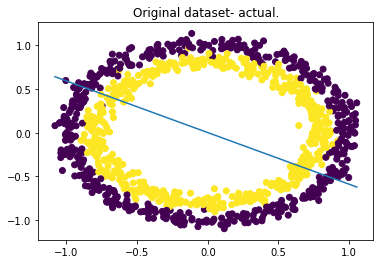

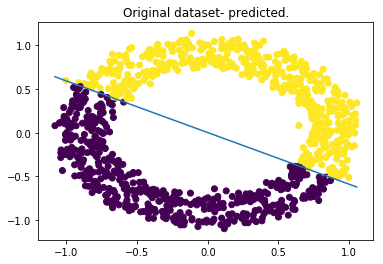

Error = 2.008


In [187]:
#run algorithm on full dataset
#insert bias
X_bias = np.insert(X, 0, 1, axis=1)

x_weights, x_y_predict = calculate_lin_class_and_plot_data(X_bias, y, 'Original dataset')

print('Error =', calculate_MSE(x_y_predict, y))

#### The linear classification result is poor because the values are not linearly separable.

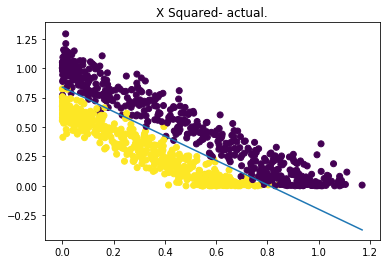

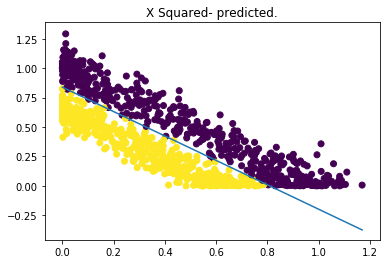

Error = 0.072


In [188]:
#now use the algorithm with new features

#create a new dataset which is X Squared
X_2 = X * X
#insert bias
X_2_bias = np.insert(X_2, 0, 1, axis=1)

x_2_weights, x_2_y_predict = calculate_lin_class_and_plot_data(X_2_bias, y, 'X Squared')

print('Error =', calculate_MSE(x_2_y_predict, y))

### The classification result is much improved as the data is now linear, rather than cyclical.
#### The Mean Square Error has reduced from 2.008 to 0.072

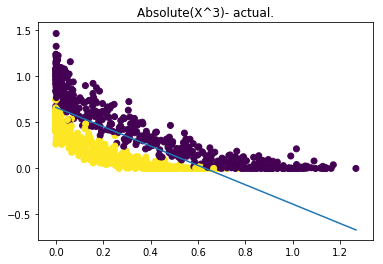

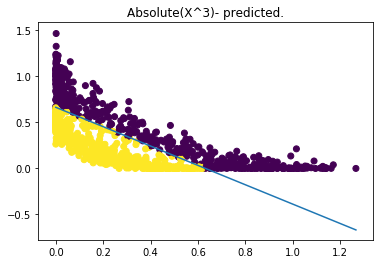

Error = 0.204


In [194]:
#create a new dataset which is Absolute(X^3)
X_3 = np.absolute(X * X * X)
#insert bias
X_3_bias = np.insert(X_3, 0, 1, axis=1)

x_3_weights, x_3_y_predict = calculate_lin_class_and_plot_data(X_3_bias, y, 'Absolute(X^3)')

print('Error =', calculate_MSE(x_3_y_predict, y))

#### The Absolute(X^3) transformation does not quite give a linear separation as indicated by the MSE of 0.204



### Example using scikit-learn Logistic Regression

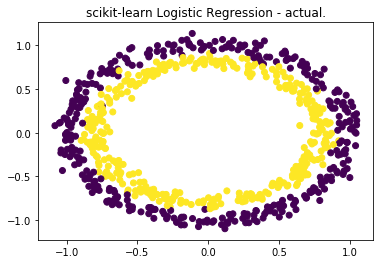

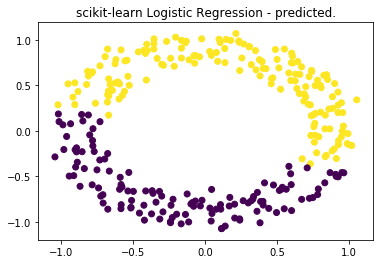

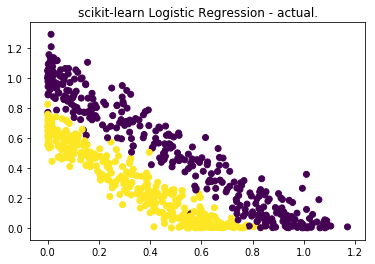

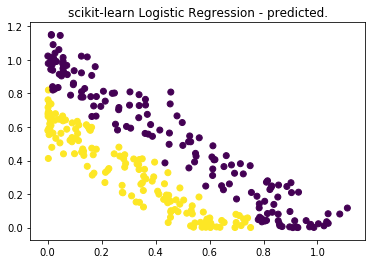

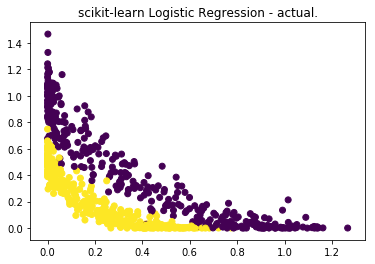

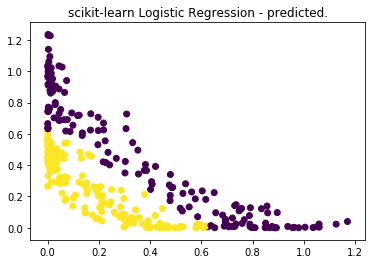

Accuracy scores:
 0.4866666666666667 
 0.9766666666666667 
 0.9466666666666667


In [213]:
# Create linear regression object

def calc_LR_and_plot_data(X, y):

    #Split into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)

    my_LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
    y_predict = my_LR.predict(X_test)

    plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
    plt.title('scikit-learn Logistic Regression - actual.')
    plt.show()

    plt.scatter(X_test[:,0], X_test[:,1], c=y_predict)
    plt.title('scikit-learn Logistic Regression - predicted.')
    plt.show()
    
    return my_LR.score(X_test, y_test)

x_score = calc_LR_and_plot_data(X, y)
x_2_score = calc_LR_and_plot_data(X_2, y)
x_3_score = calc_LR_and_plot_data(X_3, y)

print ('Accuracy scores:\n', x_score, '\n', x_2_score, '\n', x_3_score)

Logistic regresson should give a better fit for non-linear classifications becuase it produces a probabilistic output. As can be seen form the error rates, and accuracy scores, that is th ecase for the dataset above.